In [3]:
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [4]:
train_filepath = "../my_data/superfeatures1/train.csv"
test_filepath = "../my_data/superfeatures1/test.csv"

train_data = np.loadtxt(train_filepath, delimiter=",", skiprows=1)
test_data  = np.loadtxt(test_filepath,  delimiter=",", skiprows=1)

train_y = train_data[:, -1].astype(int)
test_y = test_data[:, -1].astype(int)

train_X = train_data[:, :-1]
test_X  = test_data[:, :-1]

In [ ]:
tsne_train = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    n_iter=1000,
    random_state=42
)
train_tsne = tsne_train.fit_transform(train_X)

tsne_test = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    n_iter=1000,
    random_state=42
)
test_tsne = tsne_test.fit_transform(test_X)


In [8]:
def plot_tsne(X_tsne, y, title):
    plt.figure(figsize=(8, 6))

    classes = np.unique(y)
    for cls in classes:
        idx = y == cls
        plt.scatter(
            X_tsne[idx, 0],
            X_tsne[idx, 1],
            s=20,
            alpha=0.8,
            label=f"Class {cls}"
        )

    plt.xlim(-70, 70)
    plt.ylim(-70, 70)

    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.title(title)
    plt.legend(markerscale=1.5, fontsize=9)
    plt.grid(True)
    plt.show()

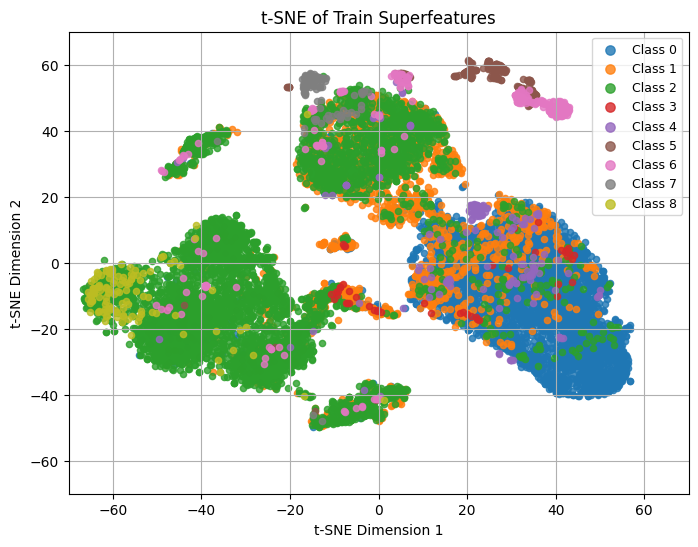

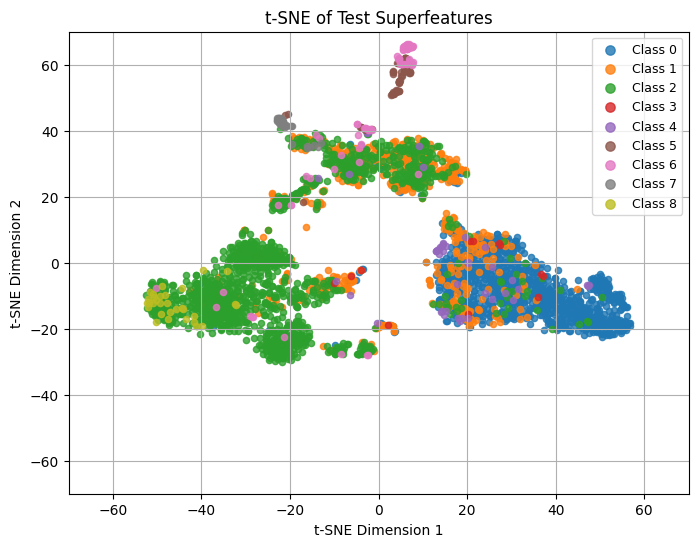

In [9]:
plot_tsne(train_tsne, train_y, "t-SNE of Train Superfeatures")
plot_tsne(test_tsne,  test_y,  "t-SNE of Test Superfeatures")

In [10]:
def plot_group(X_tsne, y, class_group, title):
    plt.figure(figsize=(8, 6))

    for cls in class_group:
        idx = y == cls
        if np.any(idx):
            plt.scatter(X_tsne[idx, 0],X_tsne[idx, 1],s=20,alpha=0.8,label=f"Class {cls}")

    plt.xlim(-70, 70)
    plt.ylim(-70, 70)

    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.title(title)
    plt.legend(fontsize=9)
    plt.grid(True)
    plt.show()

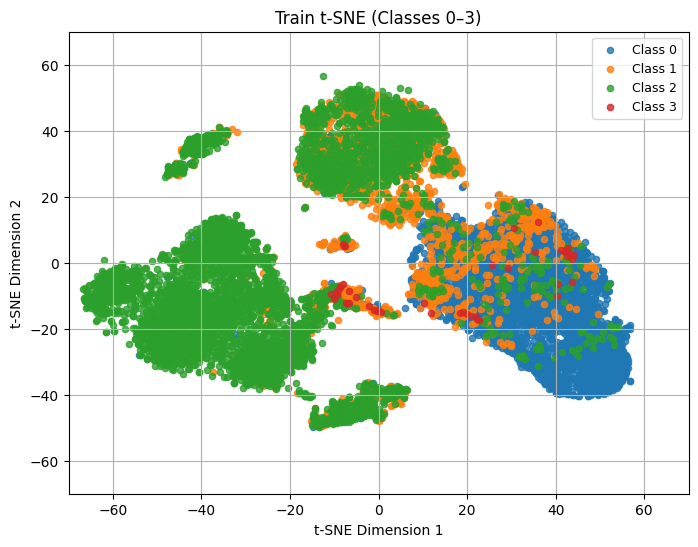

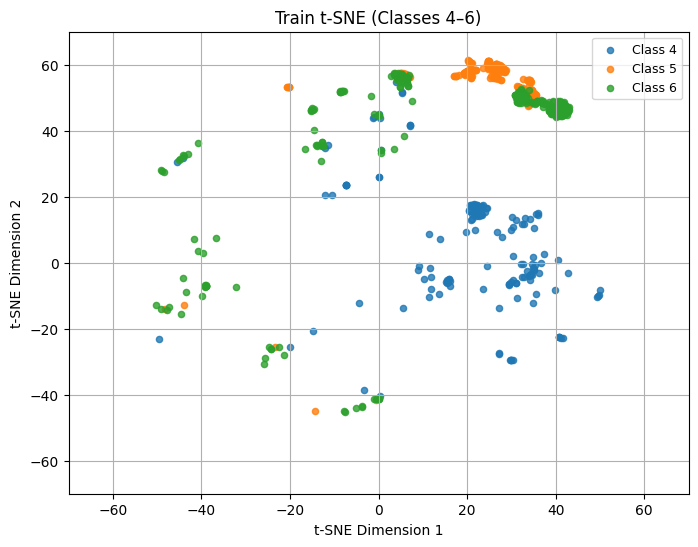

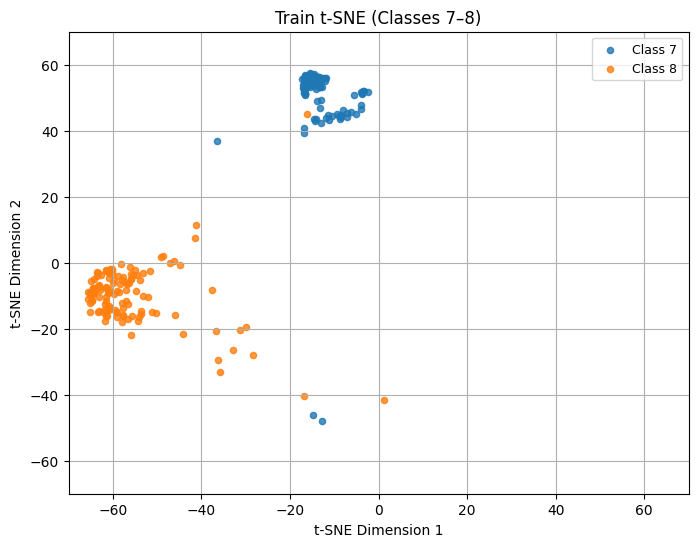

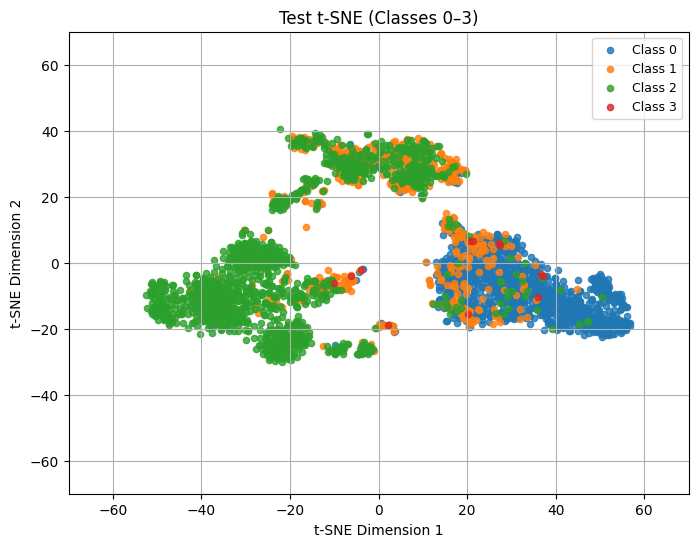

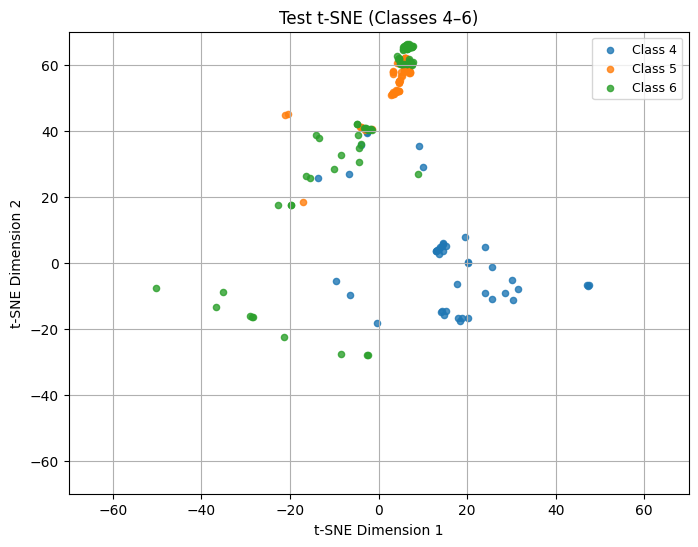

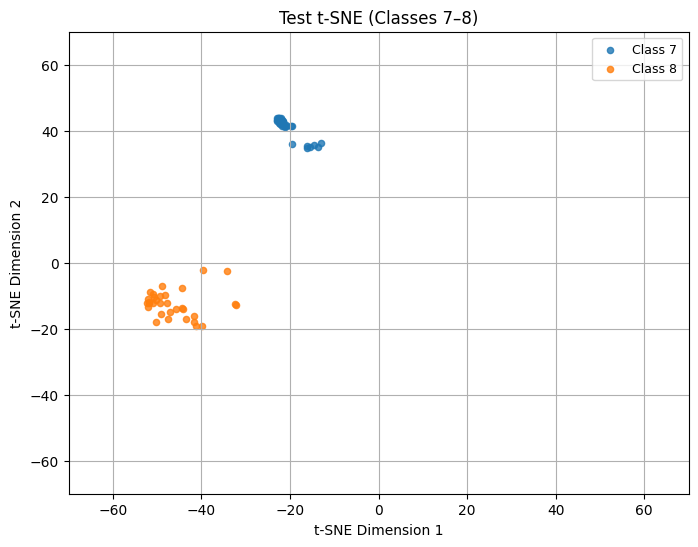

In [11]:
groups = {
    "Classes 0–3": [0, 1, 2, 3],
    "Classes 4–6": [4, 5, 6],
    "Classes 7–8": [7, 8],
}

for name, cls_group in groups.items():
    plot_group(train_tsne,train_y,cls_group,f"Train t-SNE ({name})")

for name, cls_group in groups.items():
    plot_group(test_tsne,test_y,cls_group,f"Test t-SNE ({name})")

In [ ]:
## Visualize older data used for nn (similar but is missing 90,10,75,25 percentile) and I stored it as .npy for some reason

In [12]:
train_filepath = "../nn/my_data/train_128x64_norm0to1_no_artificial.npy"
test_filepath  = "../nn/my_data/test_128x64_norm0to1_no_artificial.npy"

train_data = np.load(train_filepath)
test_data  = np.load(test_filepath)

train_y = train_data[:, -1].astype(int)
test_y  = test_data[:, -1].astype(int)

train_X = train_data[:, :-1]
test_X  = test_data[:, :-1]

print("Train shape:", train_X.shape, train_y.shape)
print("Test shape: ", test_X.shape,  test_y.shape)

Train shape: (12915, 1344) (12915,)
Test shape:  (3296, 1344) (3296,)


In [13]:
extra_tsne_train = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    n_iter=1000,
    random_state=42
)
extra_tsne_train = extra_tsne_train.fit_transform(train_X)

extra_tsne_test = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    n_iter=1000,
    random_state=42
)
extra_tsne_test = extra_tsne_test.fit_transform(test_X)

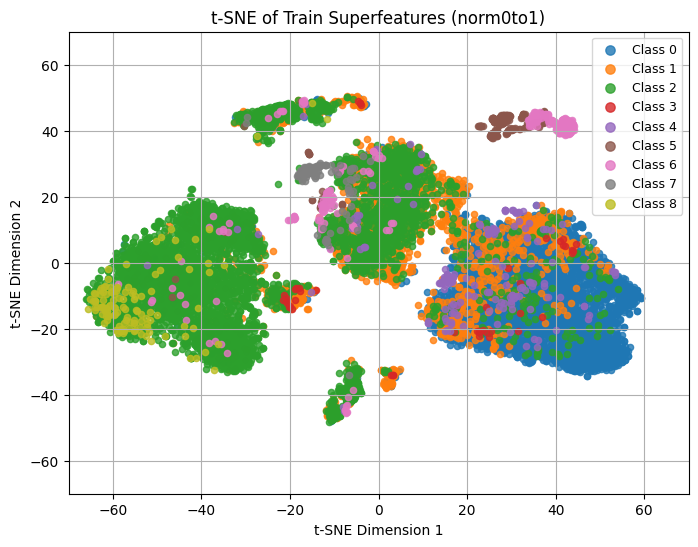

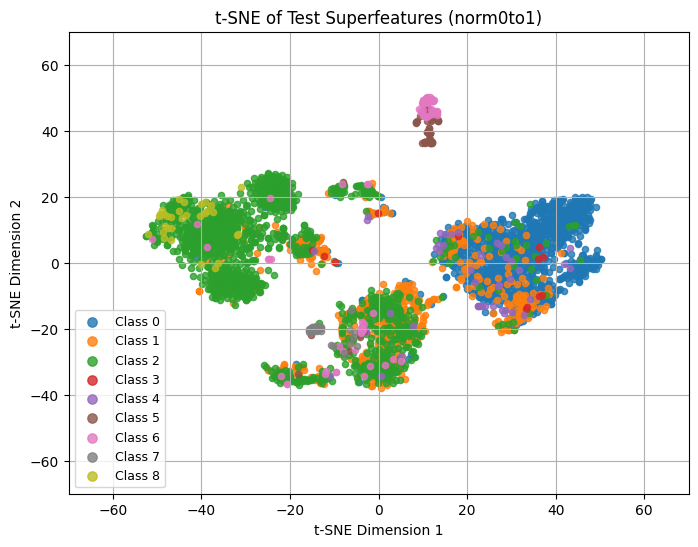

In [15]:
plot_tsne(extra_tsne_train, train_y, "t-SNE of Train Superfeatures (norm0to1)")
plot_tsne(extra_tsne_test,  test_y,  "t-SNE of Test Superfeatures (norm0to1)")